# **Assignment 2**
### *Submitted By: Shivank Sharma*

In [0]:
# Importing the required libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import KFold

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [0]:
# Load the Iris Dataset
dataset = load_iris()

## **Data Exploration**


In [3]:
# Description of the dataset
print(dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
# creating a dataframe for the dataset
iris = pd.DataFrame(dataset.data, columns=dataset.feature_names)
iris['species'] = dataset.target
iris['species']=iris['species'].apply(lambda x: dataset['target_names'][x])
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
iris.shape

(150, 5)

In [8]:
# Describing the dataset
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
species              150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
# Checking for the null values in the dataset
iris.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

### **Pair Plot**

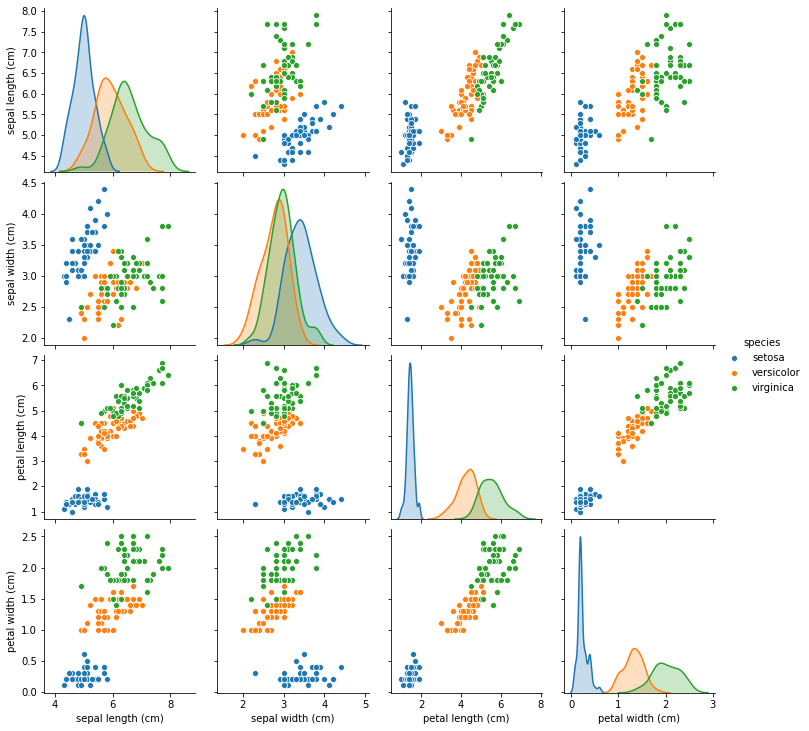

In [11]:
sns.pairplot(iris, hue='species')

### **Correlation Heatmap**

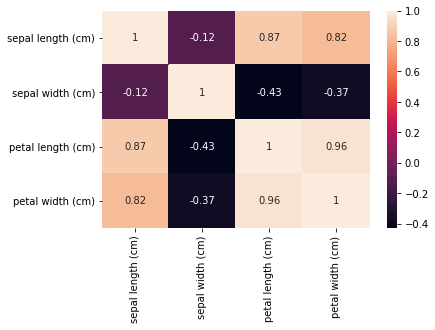

In [12]:
# correlation heatmap for the features in the dataset
sns.heatmap(iris.corr(),annot=True)

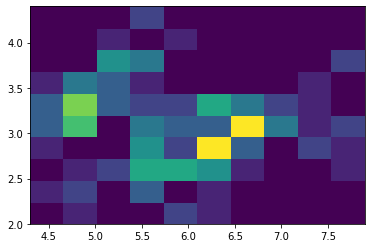

In [13]:
# Plotting the histogram
# However there was a doubt in this section regarding how to plot values on y axis
# So assumed it to be in bins as well

plt.hist2d(x=iris['sepal length (cm)'], y=iris['sepal width (cm)'], bins=10)
plt.show()

### **Scatter Plot**

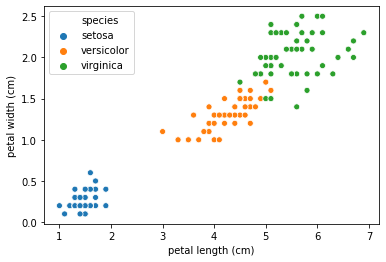

In [14]:
sns.scatterplot(iris['petal length (cm)'], iris['petal width (cm)'], hue=iris['species'])

### **Box Plots**

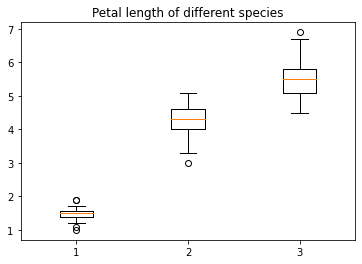

In [15]:
# plotting the boxplots
data = [iris['petal length (cm)'][0:50], iris['petal length (cm)'][51:100], iris['petal length (cm)'][101:150]]
fig7, ax7 = plt.subplots()
ax7.set_title('Petal length of different species')
ax7.boxplot(data)

plt.show()

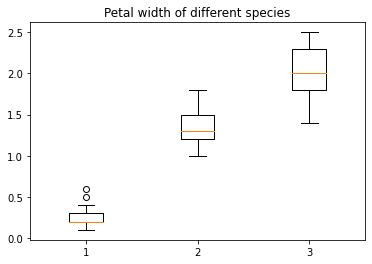

In [16]:
data = [iris['petal width (cm)'][0:50], iris['petal width (cm)'][51:100], iris['petal width (cm)'][101:150]]
fig7, ax7 = plt.subplots()
ax7.set_title('Petal width of different species')
ax7.boxplot(data)

plt.show()

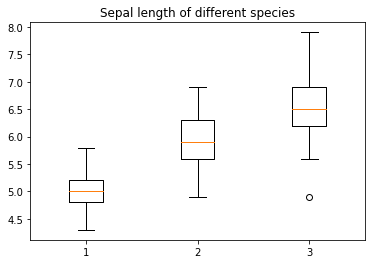

In [17]:
data = [iris['sepal length (cm)'][0:50], iris['sepal length (cm)'][51:100], iris['sepal length (cm)'][101:150]]
fig7, ax7 = plt.subplots()
ax7.set_title('Sepal length of different species')
ax7.boxplot(data)

plt.show()

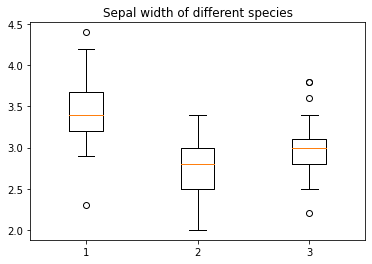

In [18]:
data = [iris['sepal width (cm)'][0:50], iris['sepal width (cm)'][51:100], iris['sepal width (cm)'][101:150]]
fig7, ax7 = plt.subplots()
ax7.set_title('Sepal width of different species')
ax7.boxplot(data)

plt.show()

In [0]:
iris_x = iris.drop(['species'], axis=1)

In [20]:
iris_x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [21]:
iris_y = pd.DataFrame(dataset.target, columns=['species'])
iris_y['species']=iris_y['species'].apply(lambda x: dataset['target_names'][x])
iris_y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


## **Data Classification**

### **Logistic Regression**

In [0]:
# Importing the Logistic Regression classifier
from sklearn.linear_model import LogisticRegression

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.85      0.92        13
   virginica       0.75      1.00      0.86         6

    accuracy                           0.93        30
   macro avg       0.92      0.95      0.92        30
weighted avg       0.95      0.93      0.94        30



              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.86      1.00      0.92         6
   virginica       1.00      0.92      0.96        13

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00         9

    accuracy    

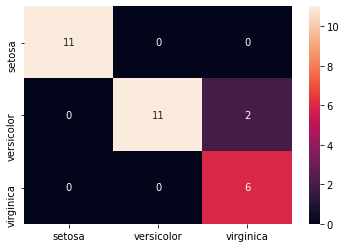

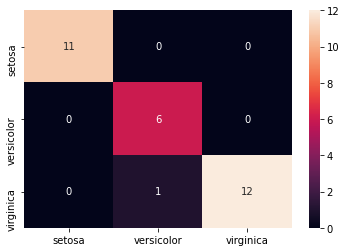

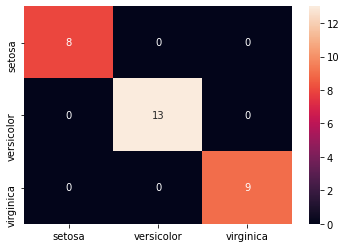

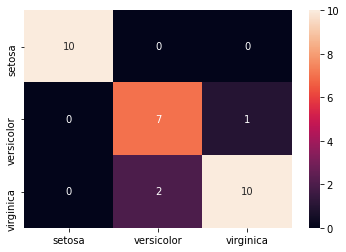

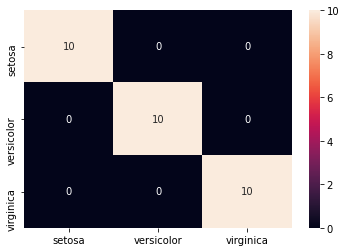

In [23]:
# Performing the five fold cross validation for the Logistic Regression model
fold = KFold(n_splits=5, shuffle=True)

acc = 0

for train_index, test_index in fold.split(iris_x):
    
    X_train, X_test, y_train, y_test = iris_x.iloc[train_index], iris_x.iloc[test_index], iris_y.iloc[train_index], iris_y.iloc[test_index]
    model = LogisticRegression(max_iter=500)
    model.fit(X_train, y_train.values.ravel())

    pred = model.predict(X_test)

    acc = acc + metrics.accuracy_score(y_test, pred)

    print(metrics.classification_report(y_test, pred))

    conf_mat = pd.DataFrame(metrics.confusion_matrix(y_test, pred), index=['setosa', 'versicolor', 'virginica'], columns=['setosa', 'versicolor', 'virginica'])
    plt.figure()
    sns.heatmap(conf_mat, annot=True)

    print('\n')

print("Average Accuracy for Logistic Regression: "+str(acc/5) + "\n\n")

### **Gaussian Naive Bayes**

In [0]:
# Importing the Gaussian Classifier
from sklearn.naive_bayes import GaussianNB

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         6
  versicolor       0.92      1.00      0.96        11
   virginica       1.00      0.92      0.96        13

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      1.00      0.93         7
   virginica       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         5
  versicolor       1.00      0.92      0.96        13
   virginica       0.92      1.00      0.96        12

    accuracy    

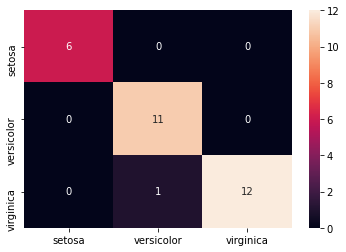

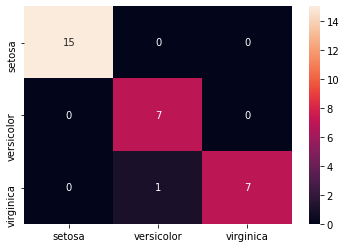

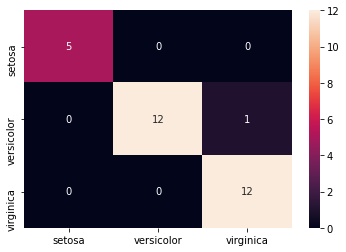

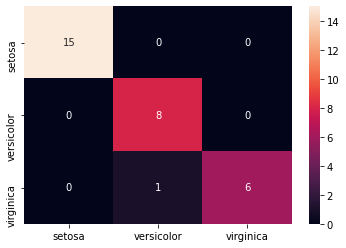

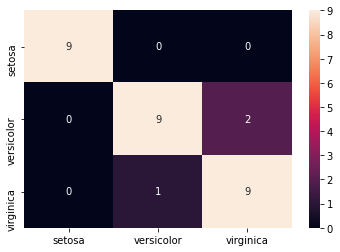

In [25]:
# Performing the five fold cross validation for the Gaussian Naive Bayes Model
gauss_fold = KFold(n_splits=5, shuffle=True)

acc = 0

for train_index, test_index in gauss_fold.split(iris_x):
    
    X_train, X_test, y_train, y_test = iris_x.iloc[train_index], iris_x.iloc[test_index], iris_y.iloc[train_index], iris_y.iloc[test_index]
    gauss_model = GaussianNB()
    gauss_model.fit(X_train, y_train.values.ravel())

    gauss_pred = gauss_model.predict(X_test)

    acc = acc + metrics.accuracy_score(y_test, gauss_pred)

    print(metrics.classification_report(y_test, gauss_pred))

    gauss_conf_mat = pd.DataFrame(metrics.confusion_matrix(y_test, gauss_pred), index=['setosa', 'versicolor', 'virginica'], columns=['setosa', 'versicolor', 'virginica'])
    plt.figure()
    sns.heatmap(gauss_conf_mat, annot=True)
    
    print('\n')

print("Average accuracy for Naive Bayes: " + str(acc/5) + "\n\n")

### **K-Means**

In [0]:
# Importing the KMeans classifier
from sklearn.cluster import KMeans

In [27]:
# Fitting the KMeans considering 3 clusters on the dataset
k_model = KMeans(n_clusters=3, init='random', n_init=10, max_iter=500)
k_model.fit(iris_x)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=500, n_clusters=3,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

![centroids](https://www.researchgate.net/profile/Laith_Abualigah/publication/318255137/figure/tbl4/AS:667901753307148@1536251595516/dentifying-the-clusters-centroid-for-the-Iris-dataset.png)

**Original Centroids for Iris Dataset**

*reference : *https://www.researchgate.net/figure/dentifying-the-clusters-centroid-for-the-Iris-dataset_tbl4_318255137*

In [28]:
k_pred = k_model.predict(iris_x)
print('Predicted Centroids: ')
print(k_model.cluster_centers_)

Predicted Centroids: 
[[5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]


In [29]:
# Printing the accuracy for the model
metrics.accuracy_score(dataset.target, k_pred)

0.8933333333333333

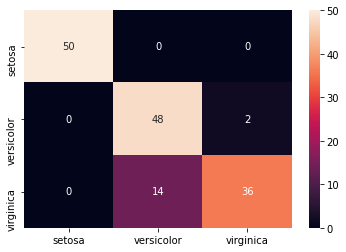

In [30]:
conf_mat = pd.DataFrame(metrics.confusion_matrix(dataset.target, k_pred), index=['setosa', 'versicolor', 'virginica'], columns=['setosa', 'versicolor', 'virginica'])
plt.figure()
sns.heatmap(conf_mat, annot=True)

### **Principal Component Analysis for Misclassified Points**
*with two principal components*

In [0]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(dataset.target, k_pred):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1

In [0]:
X = iris_x.iloc[misclassifiedIndexes]

In [0]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)

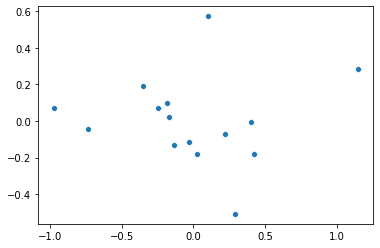

In [34]:
sns.scatterplot(X[:,0], X[:, 1])